In [2]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
print(df_market_data.columns)


Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')


In [5]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [6]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [7]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

numerical_cols = df_market_data.select_dtypes(include=['number']).columns

df_market_data[numerical_cols] = scaler.fit_transform(df_market_data[numerical_cols])




In [8]:
# Create a DataFrame with the scaled data

df_market_data.reset_index(inplace=True)

scaled_data = pd.DataFrame(df_market_data[numerical_cols], columns=numerical_cols)

# Copy the crypto names from the original DataFrame
scaled_data['coin_id'] = df_market_data['coin_id']

# Set the coin_id column as index
scaled_data.set_index('coin_id', inplace=True)

# Display the scaled DataFrame
scaled_data.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [9]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [10]:
# Create an empty list to store the inertia values
inertia_values = []


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)



C:\Users\19082\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\19082\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\19082\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\19082\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [11]:
# Create a dictionary with the data to plot the Elbow curve
edata = {
    'k': k_values,
    'inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
df_edata = pd.DataFrame(edata)

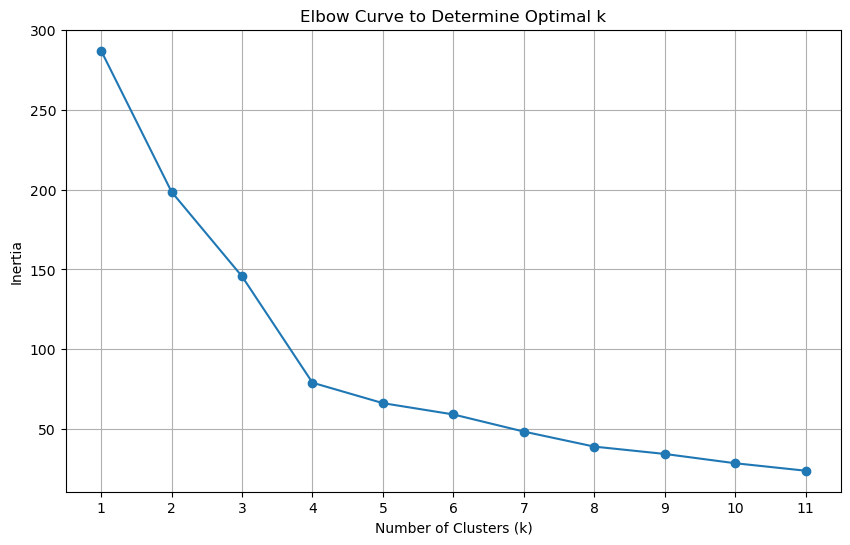

In [12]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

plt.figure(figsize=(10, 6))
plt.plot(df_edata['k'], df_edata['inertia'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve to Determine Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:**  The best value for k is 4 as it is the end of a sharp decrease of inertia

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [13]:
# Initialize the K-Means model using the best value for k
optimal_k = 4

kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=0)

In [14]:
# Fit the K-Means model using the scaled DataFrame
kmeans_optimal.fit(scaled_data)

C:\Users\19082\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [15]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
clusters = kmeans_optimal.predict(scaled_data)


# Print the resulting array of cluster values.
print(clusters)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [16]:
# Create a copy of the scaled DataFrame

scaled_data_copy = scaled_data.copy()



In [17]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
scaled_data_copy['Cluster'] = clusters


# Display the copy of the scaled DataFrame
scaled_data_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [18]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

scatter_plot = scaled_data_copy.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='Cluster',
    hover_cols=['coin_id'],
    title='Cryptocurrency Clustering'
)

# Display the scatter plot
scatter_plot

:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [19]:
# Create a PCA model instance and set `n_components=3`.

pca = PCA(n_components=3)





In [20]:
print(scaled_data.columns)



Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')


In [21]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame

pca_data = pca.fit_transform(scaled_data_copy.drop(columns=['Cluster']))

# down to three principal components.
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'], index=scaled_data_copy.index)


# View the scaled PCA data
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [22]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.

variance = pca.explained_variance_ratio_



#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** PC1 = 0.3719856 , PC2 = 0.34700813, PC3 = 0.17603793


In [23]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original scaled DataFrame
pca_df['coin_id'] = scaled_data_copy.index

# Set the coin_id column as index
pca_df.set_index('coin_id', inplace=True)

# Display the scaled PCA DataFrame
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [24]:
# Create a list with the number of k-values from 1 to 11
k_values_1 = list(range(1, 12))

In [25]:
# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

for k in k_values_1:
    
    kmeans_pca = KMeans(n_clusters=k, random_state=0)
    kmeans_pca.fit(pca_df)
    inertia_values_pca.append(kmeans_pca.inertia_)


C:\Users\19082\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\19082\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\19082\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\19082\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [26]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {
    'k': k_values_1,
    'inertia': inertia_values_pca
}


# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

df_elbow_pca.head()

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,41.357314


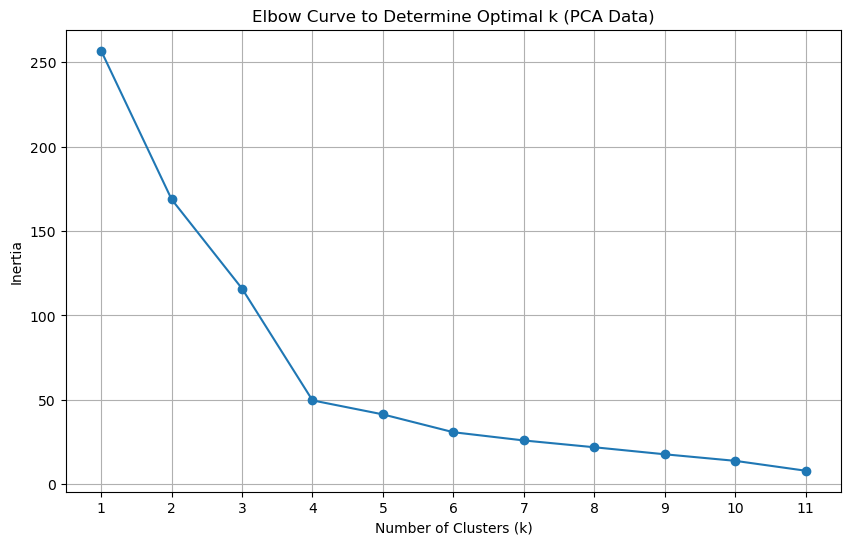

In [27]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

plt.figure(figsize=(10, 6))
plt.plot(df_elbow_pca['k'], df_elbow_pca['inertia'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve to Determine Optimal k (PCA Data)')
plt.xticks(k_values_1)
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** best value for k is 4 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** no, both answers were 4. 
  

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [28]:
# Initialize the K-Means model using the best value for k
optimal_k_pca = 4 
kmeans_optimal_pca = KMeans(n_clusters=optimal_k_pca, random_state=0)


In [29]:
# Fit the K-Means model using the PCA data
kmeans_optimal_pca.fit(pca_df)


C:\Users\19082\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [30]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
clusters_pca = kmeans_optimal_pca.predict(pca_df)


# Print the resulting array of cluster values.
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [31]:
# Create a copy of the scaled PCA DataFrame
pca_df_copy = pca_df.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
pca_df_copy['Cluster'] = pca_df['Cluster']

# Display the copy of the scaled PCA DataFrame
pca_df_copy

KeyError: 'Cluster'

In [ ]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

scatter_plot_pca = pca_df_copy.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='Cluster',
    hover_cols=['coin_id'],
    title='Cryptocurrency Clustering (PCA Data)'
)

# Display the scatter plot
scatter_plot_pca

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [ ]:
# Composite plot to contrast the Elbow curves
# # Elbow curve for original scaled data
plt.subplot(1, 2, 1)
plt.plot(df_edata['k'], df_edata['inertia'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve (Original Scaled Data)')
plt.xticks(k_values_1)
plt.grid(True)

# Elbow curve for PCA data
plt.subplot(1, 2, 2)
plt.plot(df_elbow_pca['k'], df_elbow_pca['inertia'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve (PCA Data)')
plt.xticks(k_values_1)
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Composite plot to contrast the clusters
## Scatter plot for original scaled data
scatter_plot_original = scaled_data_copy.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='Cluster',
    hover_cols=['coin_id'],
    title='Cryptocurrency Clustering (Original Scaled Data)'
)

# Scatter plot for PCA data
scatter_plot_pca = pca_df_copy.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='Cluster',
    hover_cols=['coin_id'],
    title='Cryptocurrency Clustering (PCA Data)'
)

# Composite plot
Both_plot = scatter_plot_original + scatter_plot_pca

# Display the composite plot
Both_plot.cols(1)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** The PCA model visually appears as a scaled-down version of the original, improving clustering efficiency and clarity but losing some information in the process.